This code is for building a neural network from scratch in Python.

Here I import two libraries necessary for creating and visualizing neural networks in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

! pip install -q tensor-sensor        ==>  must install this 

In [2]:
# this code is for font just 
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'  # Specify a different font family

The following function will help visualize activation functions by plotting their graphs.


Parameters:

x: This is the array of input values.

y: This is the array of corresponding output values (activation function values).

title: This is a string that sets the title of the plot.

In [3]:
def plot_func(x,y, title):
    # helper function to plot activation functions
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('activation(x)')
    plt.grid(True)
    plt.show()

The matrix x created with np.linspace provides a set of input values to evaluate and plot these functions.

In [4]:
x = np.linspace(-10, 10, 100)

In the following cells I used a number of activation functions to perform nonlinear transformations, introducing nonlinearity Instead of linear.


I modified the linear function by applying an activation function.

from these --> y = wx + b   to these -->  y =activation(wx + b).

I'll start with the sigmoid activation function.


The sigmoid activation function is a mathematical function whose output values are bounded between 0 and 1. This makes it suitable for interpreting the output as probabilistic.

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Then I will use rectified linear unit (ReLU) This function is a mathematical function.

For its positive input values, ReLU outputs the same value, while for negative values, it outputs zero. This sparsity can improve model efficiency and generalization.

In [6]:
def relu(x):
    return np.maximum(0, x)

Then I will use leaky_relu().

The Leaky ReLU activation function is a variation of the ReLU function that allows a small, non-zero output for negative input values, preventing complete suppression of information.

1).  alpha: This is a small positive constant that determines the slope for negative input values. It has a default value of 0.1.

2).  Function Body: The np.maximum function performs an element-wise comparison, returning the maximum of alpha * x and x. For positive values of x, it returns x; for negative values of x, it returns alpha * x.

In [7]:
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha*x, x)

Tanh function:  

This function defines the tanh (hyperbolic tangent) activation function.

Range: The output values are bounded between -1 and 1. This means that tanh is zero-centered, which can make optimization easier because the mean of the activations is closer to zero. 

In [8]:
def tanh(x):
    return np.tanh(x)

The last one I will use is the Softmax function.

- The softmax activation function is a mathematical function used to convert a vector of real values(raw scores (logits)) into a probability distribution over multiple classes.

- The output values of the softmax function represent probabilities that sum to 1. This makes it useful for multi-class classification problems where each class is assigned a probability.

In [9]:
def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores)

NOTE :

1). I will go on with the ReLU activation function in our implementation. 

this line of code defines a simple linear prediction function using a lambda function, which I will use to make predictions based on input data and a set of parameters (w1 and b).

Through the lambda function, prediction, I will calculate a linear prediction based on the input x, using predefined values for the weights (w1) and bias (b).

In [10]:
prediction = lambda x, w1=.2, b=1.99: x * w1 + b

-  np.maximum(0, prediction(x)):
This line computes the output of the layer by applying the ReLU activation function element-wise to the predictions generated by the prediction function.

-  I mean this code segment demonstrates the transformation of input data through a neural network layer with ReLU activation.

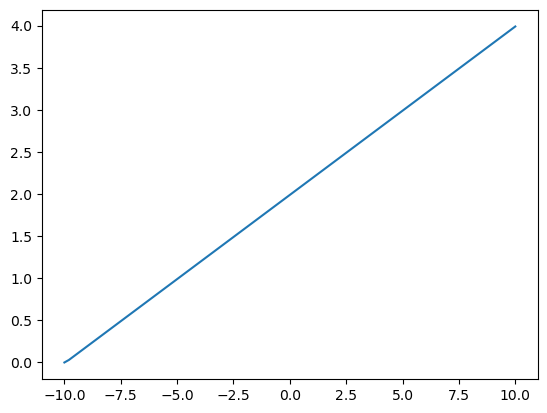

In [11]:
# Multiple Layers:
# firstOne:

layer1_1 = np.maximum(0, prediction(x))
plt.plot(x, layer1_1)

The next cell has the configuration of multiple layers in the neural network, where each layer applies a linear transformation followed by a ReLU activation function to produce its output. The outputs of multiple layers are combined to produce the final output of the network.

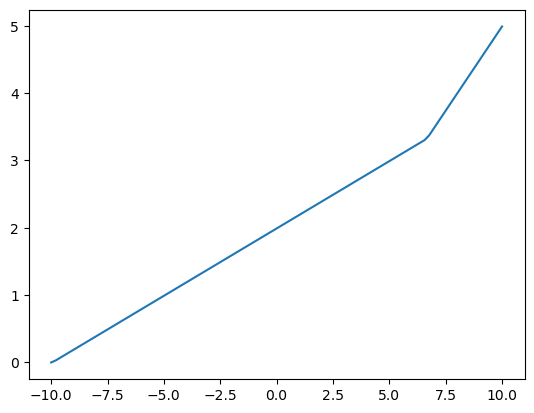

In [12]:
layer1_2 = np.maximum(0, prediction(x, .3, -2))
plt.plot(x, layer1_1+layer1_2)

NOTE: 

With more nodes in the layer, the network gains more capacity to model complex relationships and interactions within the data. 
This increased capacity often leads to the emergence of more pronounced non-linear relationships between the input and output variables. 
The network can learn to capture subtle variations and dependencies in the data that might not be captured with a smaller number of units.

So let’s add one more.

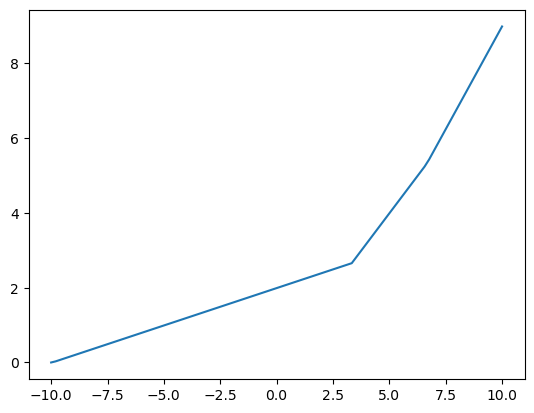

In [13]:
layer1_3 = np.maximum(0, prediction(x, .6, -2))
plt.plot(x, layer1_1+layer1_2+layer1_3)

Forward Pass phase:

I used the tsensor package to effectively visualize tensor variables.

In [14]:
from tsensor import explain as exp

x_input: is a 2D NumPy array with shape (5, 1). It contains 5 rows and 1 column, representing 5 different input values.

l1_weights: is a 2D NumPy array with shape (1, 2). This means it has 1 row and 2 columns. 

l1_bias: is a 2D NumPy array with shape (1, 2). It contains bias terms for the two units in the first layer.

 
-  This section of the code performs the linear transformation for the first layer and adds the bias terms. 

-  The with exp() as c: is used to explain or visualize the tensor operations within this block.

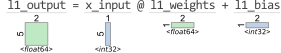

In [15]:
x_input = np.array([[10], [20], [-20], [-40], [-3]])

# 1x2 weight matrix
l1_weights = np.array([[.73, .2]])

# 1x2 bias matrix
l1_bias = np.array([[4, 2]])

# output
with exp() as c:
    l1_output = x_input @ l1_weights + l1_bias

In [16]:
l1_output

array([[ 11.3 ,   4.  ],
       [ 18.6 ,   6.  ],
       [-10.6 ,  -2.  ],
       [-25.2 ,  -6.  ],
       [  1.81,   1.4 ]])

I will apply an activation function to the output of the aforementioned process.

Next line applies the ReLU activation function to the l1_output array, introducing non-linearity and helping the neural network to model complex patterns. 

In [17]:
l1_activated = relu(l1_output)

In [18]:
l1_activated

array([[11.3 ,  4.  ],
       [18.6 ,  6.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 1.81,  1.4 ]])

Loss:

Now, I will use mean squared error to calculate the error between our output and the actual values.

In [19]:
def calculate_mse(actual, predicted):
    return (actual - predicted) ** 2

actual = np.array([[9], [13], [5], [-2], [-1]])

print(calculate_mse(actual,l1_output))

[[  5.29    25.    ]
 [ 31.36    49.    ]
 [243.36    49.    ]
 [538.24    16.    ]
 [  7.8961   5.76  ]]


- The function gradient_mse calculates the gradient of the Mean Squared Error (MSE) loss function with respect to the predicted values


- Purpose:
This function calculates the gradient of the MSE loss function with respect to the predicted values. This gradient is used during backpropagation to update the model's parameters (weights and biases).

In [20]:
def gradient_mse(actual, predicted):
    return predicted - actual

In [21]:
print(gradient_mse(actual,l1_output))

[[  2.3   -5.  ]
 [  5.6   -7.  ]
 [-15.6   -7.  ]
 [-23.2   -4.  ]
 [  2.81   2.4 ]]


Backward Pass:

The next code is calculates the gradient of the loss function with respect to the weights of the second layer. This gradient is then used to update the weights to minimize the loss function, effectively "training" the neural network.

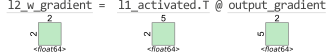

array([[ 135.2361, -182.356 ],
       [  46.734 ,  -58.64  ]])

In [22]:
output_gradient = gradient_mse(actual, l1_output)

with exp():
    l2_w_gradient =  l1_activated.T @ output_gradient
l2_w_gradient

In [23]:
l2_w_gradient

array([[ 135.2361, -182.356 ],
       [  46.734 ,  -58.64  ]])

here I transpose the output of layer 1 and multiply it by the output gradient to obtain the weight gradient.

In [24]:
l2_w_gradient =  l1_activated.T @ output_gradient

In the next line calculates the gradient of the loss with respect to the biases of the second layer in the neural network. This was done to update biases during backpropagation.

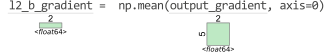

array([-5.618, -4.12 ])

In [25]:
with exp():
    l2_b_gradient =  np.mean(output_gradient, axis=0)

l2_b_gradient


In [26]:
l2_b_gradient

array([-5.618, -4.12 ])

The learning rate of training neural networks was determined. To determine the size of the steps the model takes when adjusting weights and biases during training.

In [27]:
# Set a learning rate
lr = 1e-4

In [28]:
l2_bias = np.array([[5]])

l2_weights = np.array([
    [.5],
    [.2]
])

In the next cell, I will update the weights and biases in layer 2, that subtract the gradient from the current values of w and b, scaled by the learning rate.

The learning rate helps to prevent updates that are too large, which could cause us to move away from the optimal solution with the lowest error.

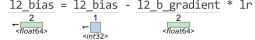

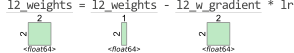

array([[0.48647639, 0.5182356 ],
       [0.1953266 , 0.205864  ]])

In [29]:
with exp():
    # Update the bias values
    l2_bias = l2_bias - l2_b_gradient * lr
    # Update the weight values
    l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

To determine the gradient of the loss with respect to the layer 1 output, we reverse the forward pass by scaling the output gradient with the weights of layer 2.

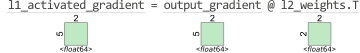

array([[ -1.4722823 ,  -0.58006882],
       [ -0.90338142,  -0.34721904],
       [-11.21668088,  -4.48814296],
       [-13.35919465,  -5.35503312],
       [  2.6107641 ,   1.04294135]])

In [30]:
with exp():
    # Calculate the gradient on the output of layer 1
    l1_activated_gradient = output_gradient @ l2_weights.T

l1_activated_gradient

now I compute the gradients for the layer 1 weight and biases.

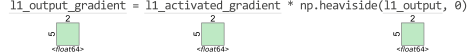

array([[-1.4722823 , -0.58006882],
       [-0.90338142, -0.34721904],
       [-0.        , -0.        ],
       [-0.        , -0.        ],
       [ 2.6107641 ,  1.04294135]])

In [31]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

this is for calculate the layer 1 gradient.

In [32]:
# back propagation
l1_w_gradient =  x_input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)


# gradient descent
l1_weights -= l1_w_gradient * lr

l1_bias = l1_bias.astype(float)

l1_bias -= l1_b_gradient * lr

The purpose of the next phase is to:

1). Train a simple neural network using an implementation of forward and backward propagation.

2). Minimize the MSE loss between predicted and actual values through iterative updates using gradient descent.

3). Visualize the training loss over epochs to evaluate the learning progress of the model.

Training phase:

In [33]:
#Library Imports
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Initialize weights and biases for each layer
# Assuming l1_weights, l1_bias, l2_weights, l2_bias are already defined correctly

In [35]:
# Define number of epochs for training
epochs = 1000

In [36]:
#Initialization:
# Initialize arrays to store loss values
losses = []

In [37]:
# loop
for epoch in range(epochs):
    # Forward pass
    l1_output = x_input @ l1_weights + l1_bias
    l1_activated = relu(l1_output)
    
    l2_output = l1_activated @ l2_weights + l2_bias
    
    # Calculate MSE loss
    loss = np.mean((actual - l2_output) ** 2)
    
    losses.append(loss)  # Store the loss
    
    # Backpropagation
    # Compute gradients
    output_gradient = 2 * (l2_output - actual) / len(x_input)
    
    l2_w_gradient = l1_activated.T @ output_gradient
    l2_b_gradient = np.mean(output_gradient, axis=0)
    
    #Hidden Layer Gradients:
        
    l1_activated_gradient = output_gradient @ l2_weights.T
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
    
    l1_w_gradient = x_input.T @ l1_output_gradient
    l1_b_gradient = np.mean(l1_output_gradient, axis=0)
    
    # Gradient descent update
    l2_weights -= lr * l2_w_gradient
    l2_bias -= lr * l2_b_gradient
    
    l1_weights -= lr * l1_w_gradient
    l1_bias -= lr * l1_b_gradient
    
    # Print loss or other metrics
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 22.751772995367332
Epoch 100, Loss: 19.22671556391472
Epoch 200, Loss: 18.68748500151418
Epoch 300, Loss: 18.268986726904057
Epoch 400, Loss: 17.915338659698612
Epoch 500, Loss: 17.603430060471748
Epoch 600, Loss: 17.318459861751833
Epoch 700, Loss: 17.050251514349032
Epoch 800, Loss: 16.791428638868165
Epoch 900, Loss: 16.536424592520447


In [38]:
# Convert losses to numpy array
losses = np.array(losses)

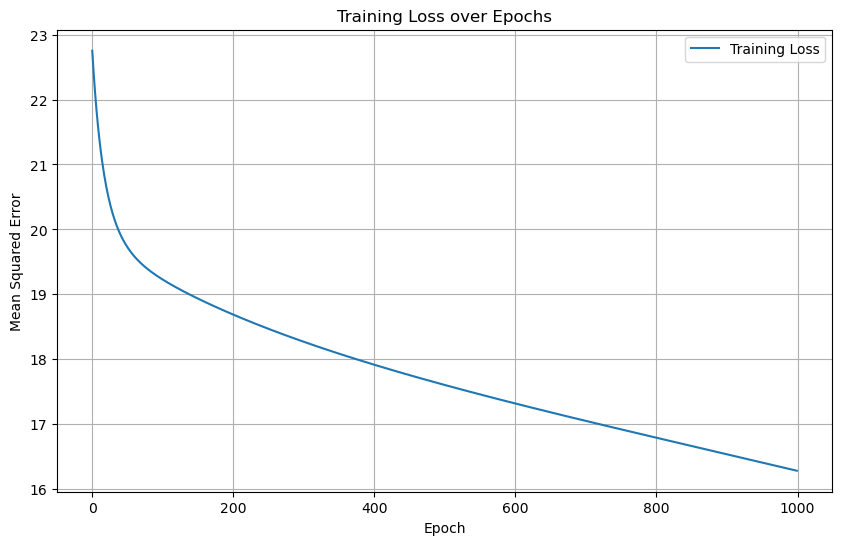

In [39]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(epochs), losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

The graph corresponding to these data points depicts the training loss over 1000 epochs. The loss curve shows a steep decline initially, followed by a more gradual decrease as the training progresses. 

_______________________________________________________________________________
_______________________________________________________________________________
_______________________________________________________________________________

A- What I learnrd from this code

B- Describe the results

C- Conclusion



All of these are in the next cell...



In the first, I learned how to create neural networks from scratch without relying on high-level libraries like TensorFlow or anything else, I learned how neural networks work in more depth and last thing My code tracking skill has become better. 



Some notes on the final results I obtained:
- At the beginning of training (epoch 0), the loss is relatively high, which is expected since the model weights are randomly initialized and the predictions are far from the actual values.
- After 100 epochs, the loss has decreased significantly, indicating that the model is learning and the predictions are becoming more accurate.
- Then the loss continues to decline, although the rate of decline is slower compared to the first 100 eras.

This indicates that the model is making more subtle adjustments to improve its predictions. It then shows a slight decrease from previous epochs, indicating a continuous but slower improvement, indicating that the model is adjusting its weights to further reduce error.

And in the end, The results from the training process of the neural network, as indicated by the decreasing MSE loss over epochs, lead to several conclusions :

- Effective Learning: The model is learning effectively, reducing the error significantly in the early stages of training.
- Optimization: The use of gradient descent is effectively optimizing the model parameters.

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________

Now I need to do training and testing phase with choose data randomley and Split the data into training and testing sets with scaling 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# Example input data
x_input = np.random.rand(100, 10)  # 100 samples, 10 features
actual = np.random.rand(100, 1)    # 100 samples, 1 target value

In [42]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_input, actual, test_size=0.2, random_state=42)

The purpose for what I do in the next cell is for scaling the data is to ensure that each feature (or variable) contributes equally to the model fitting and learning processes. 

In [43]:
# Scale the input data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Here I have initialized the weights and biases in the neural network is crucial to ensuring that the network can learn effectively during the training process. ((Randomly))

In [44]:
# Initialize weights and biases for each layer
l1_weights = np.random.rand(10, 5)  # 10 input features, 5 neurons in the hidden layer
l1_bias = np.random.rand(5)
l2_weights = np.random.rand(5, 1)   # 5 neurons in the hidden layer, 1 output neuron
l2_bias = np.random.rand(1)

In [45]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

# Set learning rate
lr = 1e-4

In [46]:
# Define number of epochs for training
epochs = 1000

In [47]:
# Initialize arrays to store loss values
train_losses = []
test_losses = []

In [48]:
# Training loop
for epoch in range(epochs):
    # Forward pass (training data)
    l1_output_train = x_train_scaled @ l1_weights + l1_bias
    l1_activated_train = relu(l1_output_train)
    
    l2_output_train = l1_activated_train @ l2_weights + l2_bias
    
    # Calculate MSE loss (training data)
    train_loss = np.mean((y_train - l2_output_train) ** 2)
    
    train_losses.append(train_loss)  # Store the training loss
    
    # Backpropagation (training data)
    # Compute gradients
    output_gradient_train = 2 * (l2_output_train - y_train) / len(x_train_scaled)
    
    l2_w_gradient_train = l1_activated_train.T @ output_gradient_train
    l2_b_gradient_train = np.mean(output_gradient_train, axis=0)
    
    l1_activated_gradient_train = output_gradient_train @ l2_weights.T
    l1_output_gradient_train = l1_activated_gradient_train * np.heaviside(l1_output_train, 0)
    
    l1_w_gradient_train = x_train_scaled.T @ l1_output_gradient_train
    l1_b_gradient_train = np.mean(l1_output_gradient_train, axis=0)
    
    # Gradient descent update (training data)
    l2_weights -= lr * l2_w_gradient_train
    l2_bias -= lr * l2_b_gradient_train
    
    l1_weights -= lr * l1_w_gradient_train
    l1_bias -= lr * l1_b_gradient_train
    
    # Evaluate on the test set
    l1_output_test = x_test_scaled @ l1_weights + l1_bias
    l1_activated_test = relu(l1_output_test)
    
    l2_output_test = l1_activated_test @ l2_weights + l2_bias
    
    # Calculate MSE loss (test data)
    test_loss = np.mean((y_test - l2_output_test) ** 2)
    
    test_losses.append(test_loss)  # Store the test loss
    
    # Print loss or other metrics
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}')


Epoch 0, Train Loss: 33.49107962680766, Test Loss: 37.66395049718483
Epoch 100, Train Loss: 17.602305339669055, Test Loss: 20.14594533411718
Epoch 200, Train Loss: 9.65863347999368, Test Loss: 11.230070076429891
Epoch 300, Train Loss: 5.47803390293385, Test Loss: 6.465287413432632
Epoch 400, Train Loss: 3.2129515125287496, Test Loss: 3.8435465539308282
Epoch 500, Train Loss: 1.964094365364565, Test Loss: 2.372843914397293
Epoch 600, Train Loss: 1.2672897645213514, Test Loss: 1.5354763077235
Epoch 700, Train Loss: 0.8746363706764473, Test Loss: 1.052146800511787
Epoch 800, Train Loss: 0.6509546634531224, Test Loss: 0.768976601505323
Epoch 900, Train Loss: 0.5216806971991158, Test Loss: 0.6000771802652209


The purpose of converting train_losses and test_losses to numpy arrays is to facilitate further analysis, visualization, or processing of these loss values. 

In [49]:
# Convert losses to numpy array
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

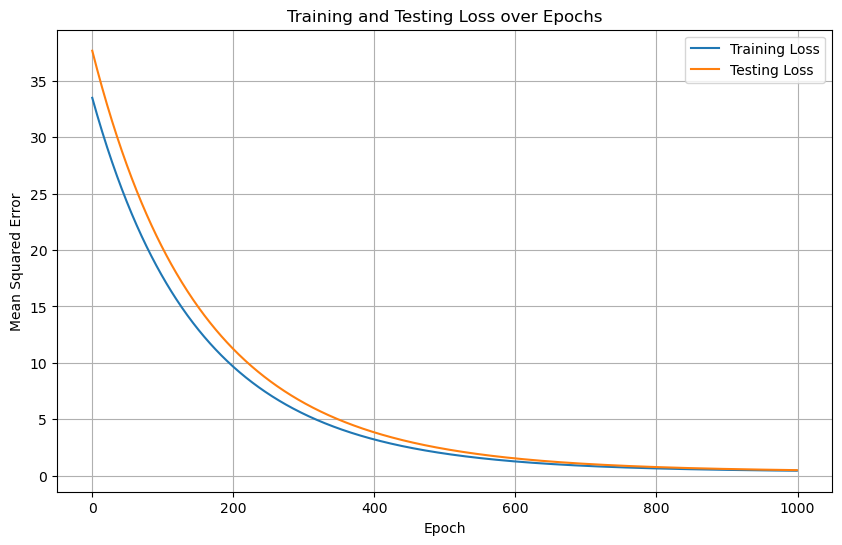

In [50]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.arange(epochs), train_losses, label='Training Loss')
plt.plot(np.arange(epochs), test_losses, label='Testing Loss')
plt.title('Training and Testing Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

NOTES:

    - Initially, both training and test losses are high, indicating that the model is not well-tuned.
    
    - As training progresses, both losses decrease significantly. This suggests that the model is starting to learn and 
      generalize from the training data.
      
    - The reduction in losses suggests that the model is becoming more accurate and better at predicting unseen data.
    
    - After that, the model shows significant improvement, as training and testing losses approach smaller values until they 
      reach a minimum.
      
    - The small difference between training and test losses at each epoch suggests that the model generalizes well to unseen 
      data, which is a positive indicator of its performance.
      
    -  By the 900th epoch, both losses are low, implying that the model has achieved a high level of accuracy and efficiency 
       in its predictions.